### Importing the required libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the data

In [83]:
url = "https://en.wikipedia.org/wiki/List_of_African_countries_by_GDP_(nominal)"
tables = pd.read_html(url)

# Preview the first table (or whichever you want)
df = tables[0]

df.head()

,Rank,Country,Nominal GDP (million US$)[1],Population[1],Per capita (US$)[1]
0,1,South Africa,410338,64146000,6397
1,2,Egypt,347342,109450000,3174
2,3,Algeria,268885,47251000,5690
3,4,Nigeria,188271,233343000,807
4,5,Morocco,165835,37712000,4397


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      55 non-null     object
 1   Country                   55 non-null     object
 2   Nominal GDP(million US$)  55 non-null     int64 
 3   Population                55 non-null     int64 
 4   Per capita(US$)           55 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ KB


In [85]:
df.columns = ['Rank', 'Country', 'Nominal GDP(million US$)', 'Population', 'Per capita(US$)']

In [86]:
df.dtypes

Rank                        object
Country                     object
Nominal GDP(million US$)    object
Population                  object
Per capita(US$)             object
dtype: object

In [87]:
df['Nominal GDP(million US$)'].unique()

array(['410338', '347342', '268885', '188271', '165835', '131673',
       '117457', '113343', '94483', '88332', '85977', '79119', '64277',
       '56291', '56011', '47484', '38172', '34728', '31506', '30094',
       '28910', '27056', '23771', '23208', '22236', '21874', '20391',
       '19400', '18792', '18708', '15495', '15281', '14771', '14214',
       '13959', '12994', '12684', '11470', '10023', '8386', '6745',
       '5483', '5166', '4587', '3998', '2932', '2786', '2771', '2404',
       '2274', '2198', '1,982 (2019)', '1548', '864', '$ 2,848,979'],
      dtype=object)

In [88]:
df['Nominal GDP(million US$)'] = (
    df['Nominal GDP(million US$)']
    .astype(str)                             # Ensure all values are strings
    .str.replace(r'\(.*?\)', '', regex=True) # Removes all the characters enclosed by parenthesis
    .str.replace(r'[^\d]', '', regex=True)   # Remove all non-digit characters
    .replace('', '0')                        # Handle any empty strings after cleaning
    .astype(int)                             # Convert to intege
)   

In [89]:
df['Nominal GDP(million US$)'].unique()

array([ 410338,  347342,  268885,  188271,  165835,  131673,  117457,
        113343,   94483,   88332,   85977,   79119,   64277,   56291,
         56011,   47484,   38172,   34728,   31506,   30094,   28910,
         27056,   23771,   23208,   22236,   21874,   20391,   19400,
         18792,   18708,   15495,   15281,   14771,   14214,   13959,
         12994,   12684,   11470,   10023,    8386,    6745,    5483,
          5166,    4587,    3998,    2932,    2786,    2771,    2404,
          2274,    2198,    1982,    1548,     864, 2848979])

In [92]:
df['Population'].unique()

array(['64146000', '109450000', '47251000', '233343000', '37712000',
       '53354000', '110148000', '39297000', '32897000', '35064000',
       '67175000', '106552000', '48022000', '12432000', '30032000',
       '6982000', '17360000', '19173000', '50418000', '15803000',
       '21707000', '24451000', '35835000', '24790000', '14516000',
       '29126000', '2306000', '2763000', '18961000', '31444000',
       '1256000', '6486000', '14162000', '3049000', '24057000',
       '16963000', '1637000', '4629000', '9515000', '9157000', '13766000',
       '1189000', '5692000', '1056000', '15896000', '5513000', '514000',
       '2805000', '2190000', '2019000', '102000', '3,497,000 (2019)',
       '910000', '242000', '1488812000'], dtype=object)

In [98]:
df['Population'] = (df['Population']
    .astype(str)
    .str.replace(r'\(.*?\)', '', regex= True)
    .str.replace(r'[^\d]', '', regex= True)
    .replace('', '0')
    .astype(int)
)

In [99]:
df['Population'].unique()

array([  64146000,  109450000,   47251000,  233343000,   37712000,
         53354000,  110148000,   39297000,   32897000,   35064000,
         67175000,  106552000,   48022000,   12432000,   30032000,
          6982000,   17360000,   19173000,   50418000,   15803000,
         21707000,   24451000,   35835000,   24790000,   14516000,
         29126000,    2306000,    2763000,   18961000,   31444000,
          1256000,    6486000,   14162000,    3049000,   24057000,
         16963000,    1637000,    4629000,    9515000,    9157000,
         13766000,    1189000,    5692000,    1056000,   15896000,
          5513000,     514000,    2805000,    2190000,    2019000,
           102000,    3497000,     910000,     242000, 1488812000])

In [101]:
df['Per capita(US$)'].unique()

array(['6397', '3174', '5690', '807', '4397', '2468', '1066', '2884',
       '2872', '2519', '1280', '743', '1338', '4528', '1865', '6801',
       '2199', '1811', '625', '1904', '1332', '1107', '663', '936',
       '1532', '751', '8842', '7021', '991', '595', '12332', '2356',
       '1043', '4661', '580', '766', '7750', '2478', '1053', '916', '490',
       '4613', '907', '4343', '251', '532', '5421', '988', '1098', '1126',
       '21633', '567 (2019)', '1702', '3569', '$ 1,914'], dtype=object)

In [103]:
df['Per capita(US$)'] = (df['Per capita(US$)']
    .astype(str)
    .str.replace(r'\(.*?\)', '', regex= True)
    .str.replace(r'[^\d]', '', regex= True)
    .replace('', '0')
    .astype(int)
)

In [104]:
df['Per capita(US$)'].unique()

array([  64146000,  109450000,   47251000,  233343000,   37712000,
         53354000,  110148000,   39297000,   32897000,   35064000,
         67175000,  106552000,   48022000,   12432000,   30032000,
          6982000,   17360000,   19173000,   50418000,   15803000,
         21707000,   24451000,   35835000,   24790000,   14516000,
         29126000,    2306000,    2763000,   18961000,   31444000,
          1256000,    6486000,   14162000,    3049000,   24057000,
         16963000,    1637000,    4629000,    9515000,    9157000,
         13766000,    1189000,    5692000,    1056000,   15896000,
          5513000,     514000,    2805000,    2190000,    2019000,
           102000,    3497000,     910000,     242000, 1488812000])

In [105]:
df.dtypes

Rank                        object
Country                     object
Nominal GDP(million US$)     int64
Population                   int64
Per capita(US$)              int64
dtype: object

In [107]:
df.describe()

,Nominal GDP(million US$),Population,Per capita(US$)
count,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.035992e+05,5.413862e+07,5.413862e+07
std,3.860846e+05,2.008487e+08,2.008487e+08
min,8.640000e+02,1.020000e+05,1.020000e+05
25%,7.565500e+03,3.273000e+06,3.273000e+06
50%,2.039100e+04,1.589600e+07,1.589600e+07
75%,6.028400e+04,3.544950e+07,3.544950e+07
max,2.848979e+06,1.488812e+09,1.488812e+09


In [120]:
top_five = df.nlargest(n= 6, columns= 'Nominal GDP(million US$)').drop(54)
top_five

,Rank,Country,Nominal GDP(million US$),Population,Per capita(US$)
0,1,South Africa,410338,64146000,64146000
1,2,Egypt,347342,109450000,109450000
2,3,Algeria,268885,47251000,47251000
3,4,Nigeria,188271,233343000,233343000
4,5,Morocco,165835,37712000,37712000


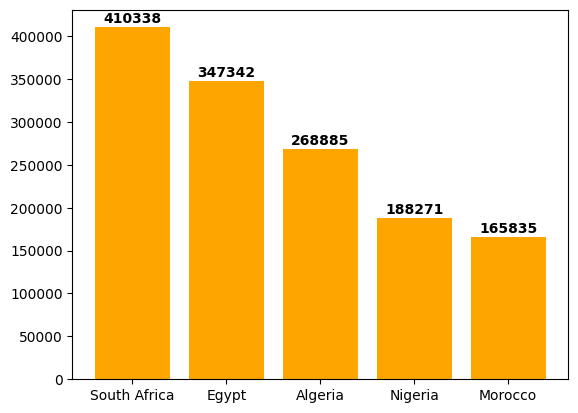

In [156]:
plt.bar(top_five['Country'], top_five['Nominal GDP(million US$)'], color= 'orange')

for i,v in enumerate(top_five['Nominal GDP(million US$)']):
    plt.text(i, v+5000, str(v), ha='center', weight= 'bold', size=10)

plt.show()